In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.discrete.discrete_model import Logit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
%run Mappings.ipynb
%run Helpers.ipynb
# %run /content/drive/MyDrive/DentistDataAnalysis/Experiments/Mappings.ipynb
# %run /content/drive/MyDrive/DentistDataAnalysis/Experiments/Helpers.ipynb

In [4]:
# DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/'
# IMG_DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/images/'
DIR = ''
IMG_DIR = 'images/'

In [5]:
data = pd.read_excel(DIR+'dataset/TusekI_DataSet_Pregnangcy.xlsx', usecols=source_columns_SR, engine='openpyxl')
data.columns = source_columns_EN
data

,Que1,Que2,Que3,Que4,Que5,Que6,Que7,Que8,Que9,Que10_a,...,Que27_twin,Que28,Que28_twin,Que29,Que30,Que31,Que32,Que33,Que34,Que35
0,2.0,3.0,2.0,4.0,1.0,NaN,NaN,4.0,6.0,1.0,...,NaN,3.0,NaN,5.0,1.0,1.0,5.0,5.0,6.0,NaN
1,5.0,5.0,3.0,4.0,3.0,4.0,4.0,2.0,6.0,1.0,...,NaN,3.0,NaN,7.0,4.0,2.0,2.0,5.0,1.0,1.0
2,4.0,1.0,2.0,6.0,4.0,1.0,NaN,2.0,NaN,NaN,...,NaN,3.0,NaN,7.0,1.0,3.0,3.0,5.0,1.0,3.0
3,2.0,1.0,2.0,9.0,3.0,1.0,5.0,3.0,4.0,NaN,...,NaN,3.0,NaN,2.0,4.0,NaN,4.0,5.0,4.0,1.0
4,NaN,3.0,3.0,4.0,NaN,NaN,2.0,2.0,6.0,NaN,...,NaN,3.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,5.0,NaN,1.0,4.0,1.0,6.0,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,2.0,NaN
4306,4.0,1.0,4.0,9.0,2.0,1.0,2.0,2.0,6.0,1.0,...,NaN,NaN,3.0,6.0,4.0,3.0,5.0,3.0,4.0,1.0
4307,3.0,5.0,4.0,NaN,1.0,NaN,NaN,2.0,6.0,NaN,...,NaN,3.0,NaN,7.0,3.0,1.0,2.0,NaN,6.0,NaN
4308,2.0,NaN,NaN,6.0,2.0,NaN,3.0,3.0,2.0,4.0,...,NaN,3.0,NaN,NaN,3.0,3.0,5.0,3.0,1.0,1.0


In [6]:
for index, row in data.iterrows():
    for col in data.columns:
        if col=='Que1' or col=='Que14' or col=='Que15' or col=='Que22':
            if row[col]<=0 or row[col]>5:
                row[col] = np.nan
        elif col=='Que2' or col=='Que4' or col=='Que6' or col=='Que16':
            if row[col]<=0 or row[col]>6:
                row[col] = np.nan
        elif col=='Que3' or col=='Que5' or col=='Que10_a' or col=='Que10_b' or col=='Que10_c' or col=='Que10_d' or col=='Que10_e' or col=='Que10_f' or col=='Que19' or col=='Que20' or col=='Que21':
            if row[col]<=0 or row[col]>4:
                row[col] = np.nan
        elif col=='Que11' or col=='Que12' or col=='Que13' or col=='Que17':
            if row[col]<=0 or row[col]>3:
                row[col] = np.nan
        elif col=='Que18_age':
            if row[col]<15 or row[col]>50:
                row[col] = np.nan

In [7]:
data['Que_smoking'] = np.nan

In [8]:
#1 - yes
#2 - no
for index, row in data.iterrows():
    if row['Que11']==3 and row['Que12']==3 and row['Que13']==3:
        row['Que_smoking']=2
    elif row['Que11']==1 or row['Que11']==2 or row['Que12']==1 or row['Que12']==2 or row['Que13']==1 or row['Que13']==2:
        row['Que_smoking']=1
    else:
        row['Que_smoking']=np.nan
data = data.drop(['Que11', 'Que12', 'Que13'], axis=1)

In [9]:
data

,Que1,Que2,Que3,Que4,Que5,Que6,Que7,Que8,Que9,Que10_a,...,Que28,Que28_twin,Que29,Que30,Que31,Que32,Que33,Que34,Que35,Que_smoking
0,2.0,3.0,2.0,4.0,1.0,NaN,NaN,4.0,6.0,1.0,...,3.0,NaN,5.0,1.0,1.0,5.0,5.0,6.0,NaN,1.0
1,5.0,5.0,3.0,4.0,3.0,4.0,4.0,2.0,6.0,1.0,...,3.0,NaN,7.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0
2,4.0,1.0,2.0,6.0,4.0,1.0,NaN,2.0,NaN,NaN,...,3.0,NaN,7.0,1.0,3.0,3.0,5.0,1.0,3.0,NaN
3,2.0,1.0,2.0,NaN,3.0,1.0,5.0,3.0,4.0,NaN,...,3.0,NaN,2.0,4.0,NaN,4.0,5.0,4.0,1.0,NaN
4,NaN,3.0,3.0,4.0,NaN,NaN,2.0,2.0,6.0,NaN,...,3.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,5.0,NaN,1.0,4.0,1.0,6.0,NaN,NaN,NaN,NaN,...,3.0,NaN,5.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4306,4.0,1.0,4.0,NaN,2.0,1.0,2.0,2.0,6.0,1.0,...,NaN,3.0,6.0,4.0,3.0,5.0,3.0,4.0,1.0,2.0
4307,3.0,5.0,4.0,NaN,1.0,NaN,NaN,2.0,6.0,NaN,...,3.0,NaN,7.0,3.0,1.0,2.0,NaN,6.0,NaN,NaN
4308,2.0,NaN,NaN,6.0,2.0,NaN,3.0,3.0,2.0,4.0,...,3.0,NaN,NaN,3.0,3.0,5.0,3.0,1.0,1.0,NaN


In [10]:
cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22', 'Que_smoking']
numeric_cols = ['Que18_age']
target_col = 'Que16'
target = pd.DataFrame(data[target_col])
data = data[cols]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Que1         3940 non-null   float64
 1   Que2         3891 non-null   float64
 2   Que3         3778 non-null   float64
 3   Que4         2927 non-null   float64
 4   Que5         3762 non-null   float64
 5   Que6         2462 non-null   float64
 6   Que10_a      3874 non-null   float64
 7   Que10_b      3783 non-null   float64
 8   Que10_c      3708 non-null   float64
 9   Que10_d      3678 non-null   float64
 10  Que10_e      3821 non-null   float64
 11  Que10_f      3776 non-null   float64
 12  Que14        3776 non-null   float64
 13  Que15        3717 non-null   float64
 14  Que17        3649 non-null   float64
 15  Que18_age    3852 non-null   float64
 16  Que19        3839 non-null   float64
 17  Que20        3695 non-null   float64
 18  Que21        3829 non-null   float64
 19  Que22 

In [12]:
print(data.describe())

              Que1         Que2         Que3         Que4         Que5  \
count  3940.000000  3891.000000  3778.000000  2927.000000  3762.000000   
mean      3.039594     3.245695     2.751191     4.016057     2.293993   
std       1.213220     1.510470     0.823940     0.967384     1.161837   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     4.000000     1.000000   
50%       2.000000     3.000000     3.000000     4.000000     2.000000   
75%       4.000000     5.000000     3.000000     4.000000     3.000000   
max       5.000000     6.000000     4.000000     6.000000     4.000000   

              Que6      Que10_a      Que10_b      Que10_c      Que10_d  ...  \
count  2462.000000  3874.000000  3783.000000  3708.000000  3678.000000  ...   
mean      2.625914     1.320599     1.719535     2.777238     2.271887  ...   
std       1.853258     0.566701     0.645823     0.627144     0.666236  ...   
min       1.00000

<AxesSubplot:>

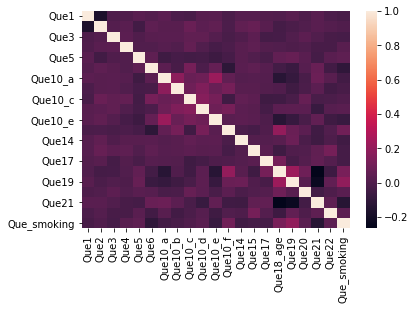

In [13]:
corr = data.corr()
sns.heatmap(corr)

In [14]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Que16   3845 non-null   float64
dtypes: float64(1)
memory usage: 33.8 KB


In [15]:
target.describe()

,Que16
count,3845.000000
mean,3.030429
std,1.621865
min,1.000000
25%,1.000000
50%,4.000000
75%,4.000000
max,6.000000


/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


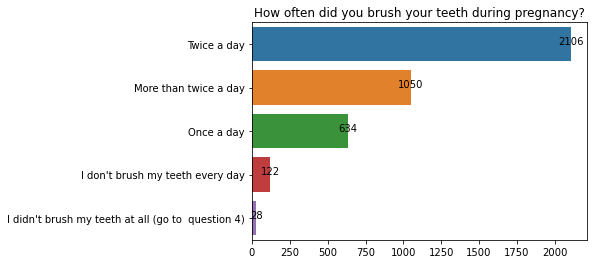

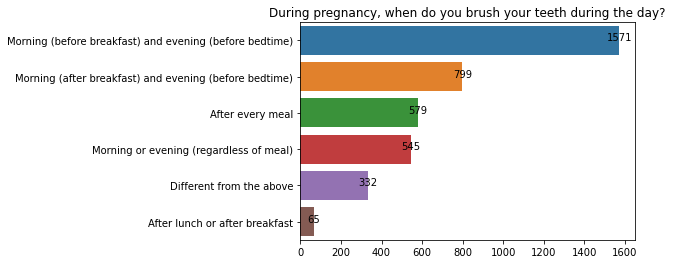

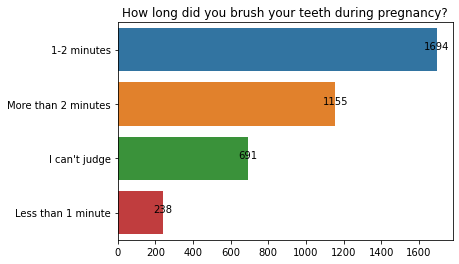

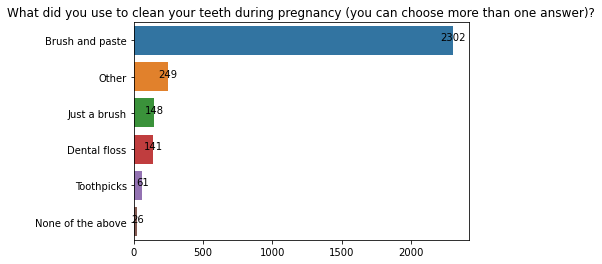

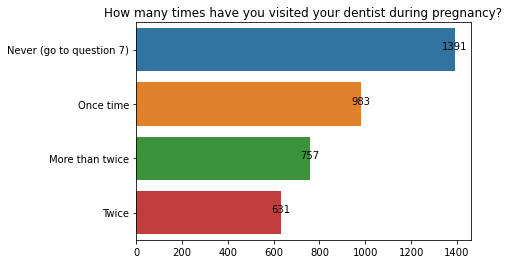

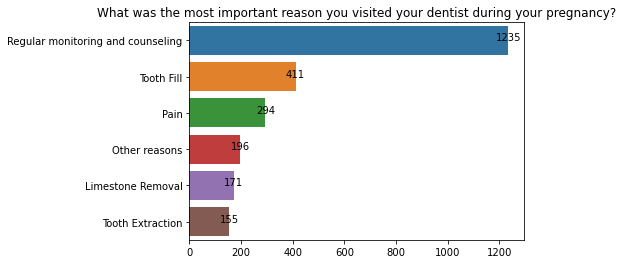

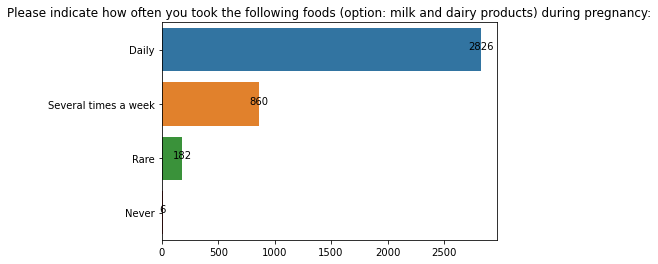

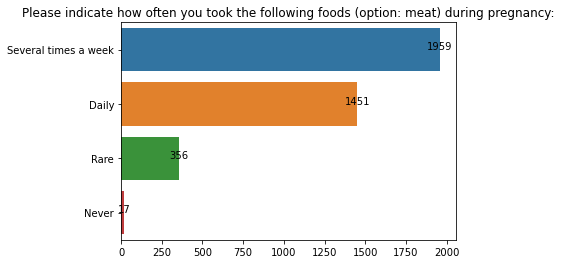

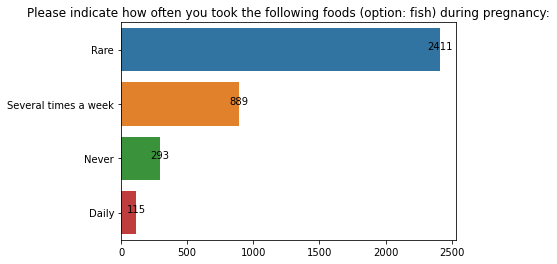

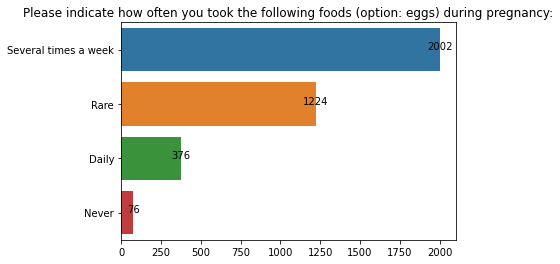

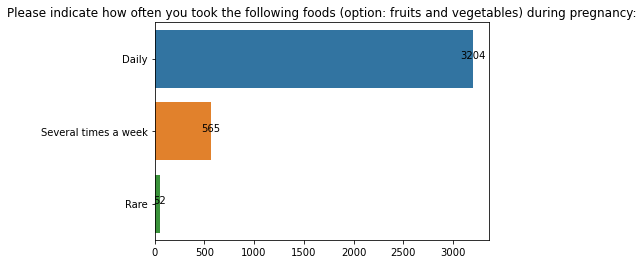

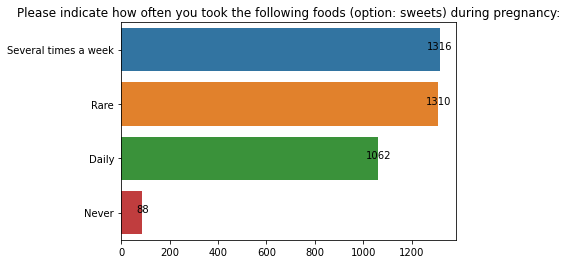

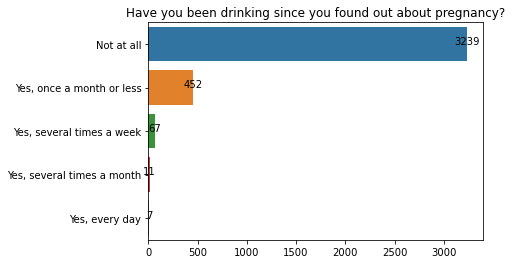

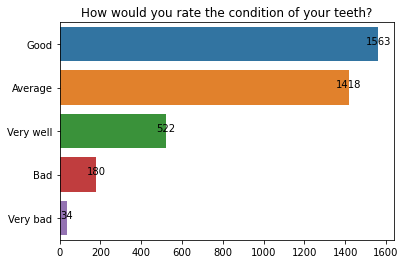

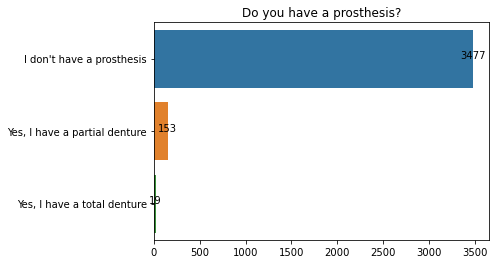

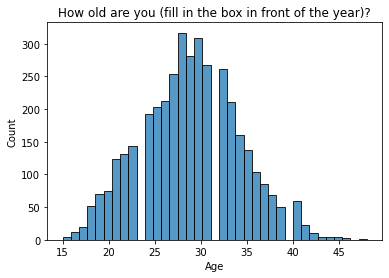

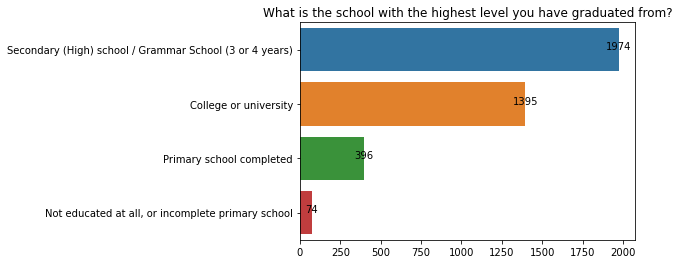

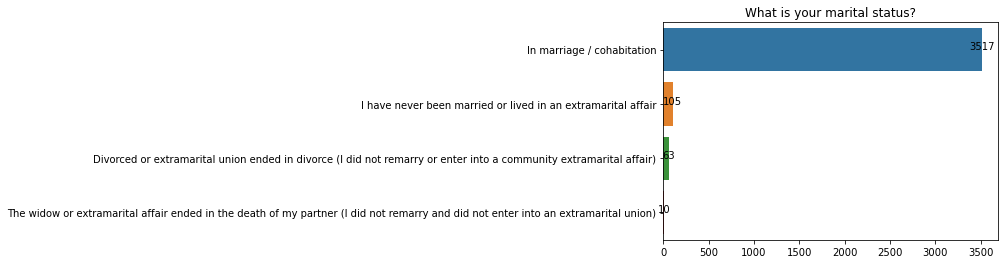

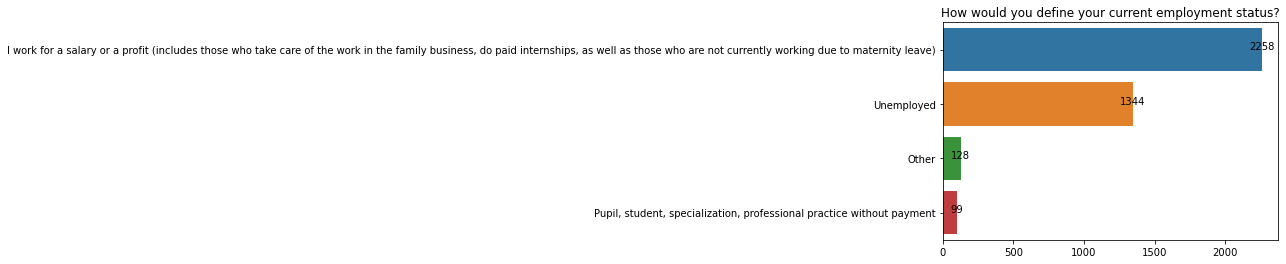

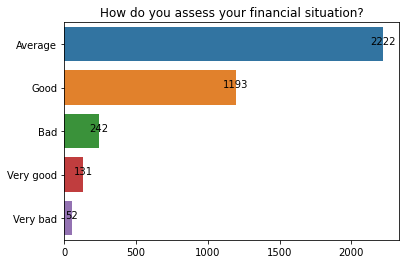

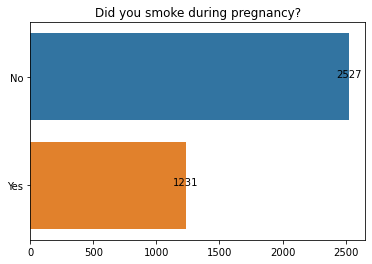

In [16]:
for idx, col in enumerate(data.columns):
    title = questions_EN[col]['text'] 
    barplot(data, idx, col, title, numeric_cols, questions_EN)

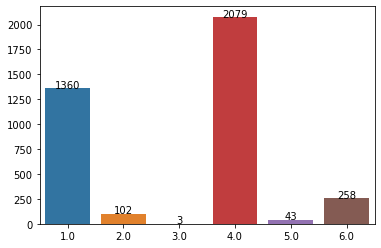

In [17]:
val_cnts = target[target_col].value_counts()
# replace x and y with each other for vertical plot
ax = sns.barplot(x=val_cnts.index, y=val_cnts.values)
for ind, val in val_cnts.items():
    ax.text(ind-1, val, val, color='black', ha="center")

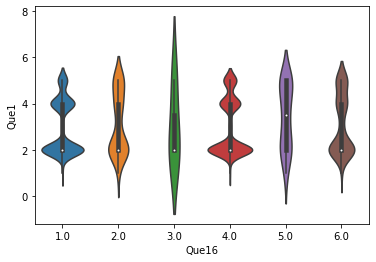

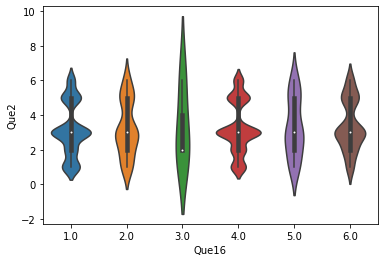

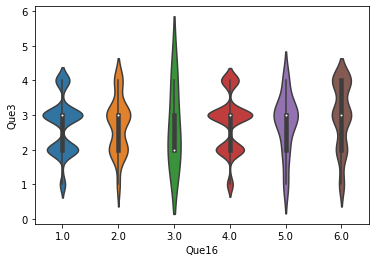

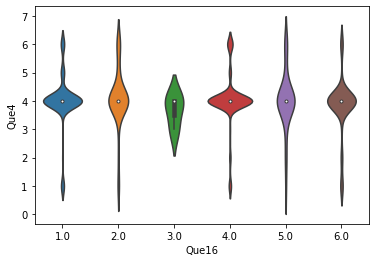

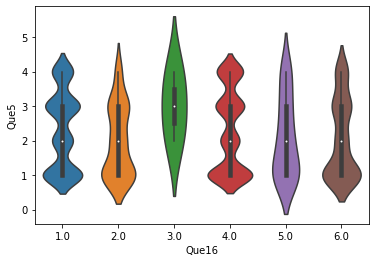

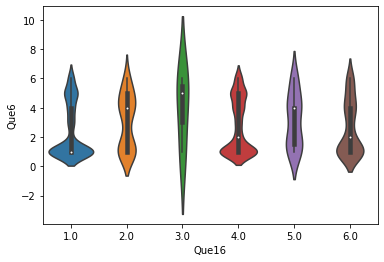

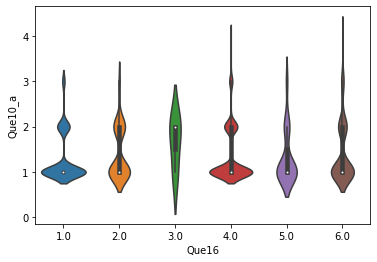

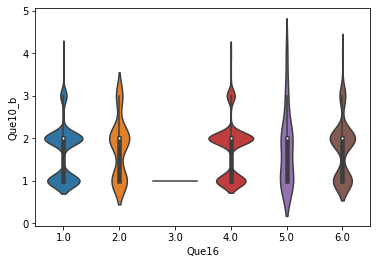

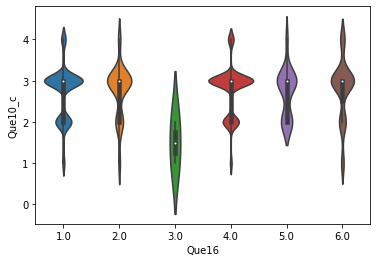

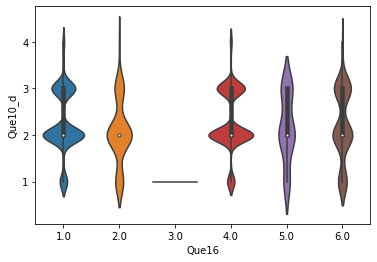

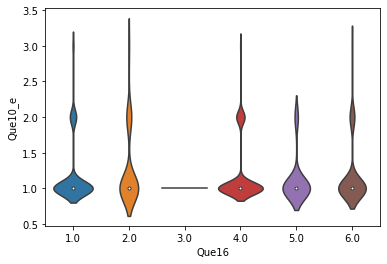

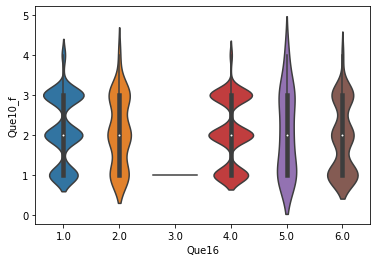

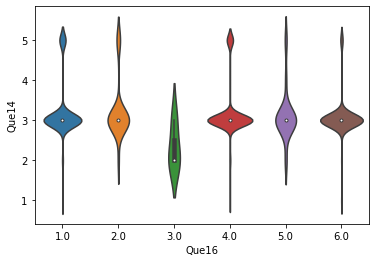

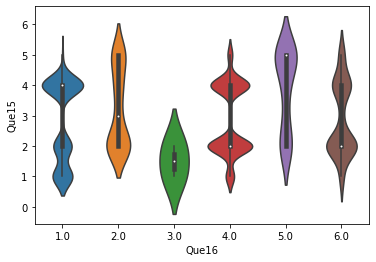

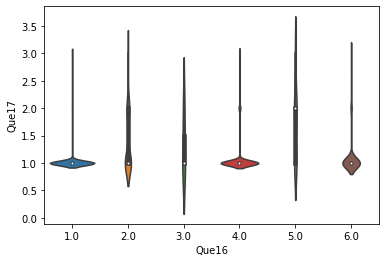

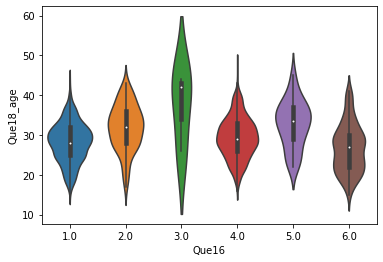

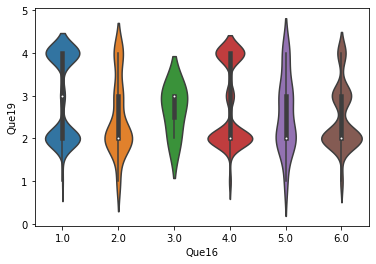

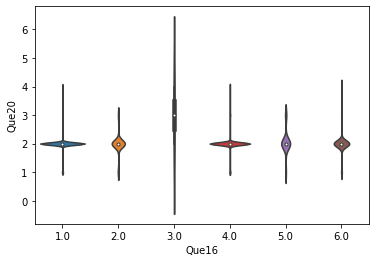

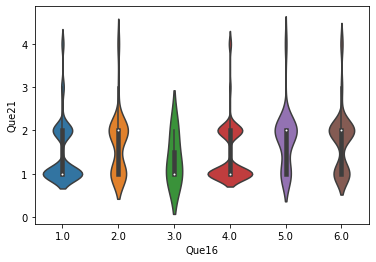

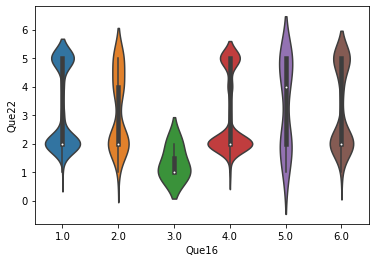

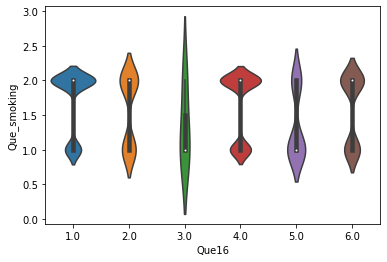

In [18]:
for col in cols:
    sns.violinplot(x=target[target_col], y=data[col])
    plt.show()

In [19]:
model_data = perform_mapping(data, questions_map_EN)
model_data

,Que1,Que2,Que3,Que4,Que5,Que6,Que10_a,Que10_b,Que10_c,Que10_d,...,Que10_f,Que14,Que15,Que17,Que18_age,Que19,Que20,Que21,Que22,Que_smoking
0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,0.0,...,1.0,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN
3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
4,NaN,0.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,...,1.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,1.0,NaN,1.0,0.0,1.0,1.0,NaN,NaN,1.0,NaN,...,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
4306,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4307,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
4308,0.0,NaN,NaN,1.0,0.0,NaN,1.0,1.0,1.0,1.0,...,NaN,1.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN


<AxesSubplot:>

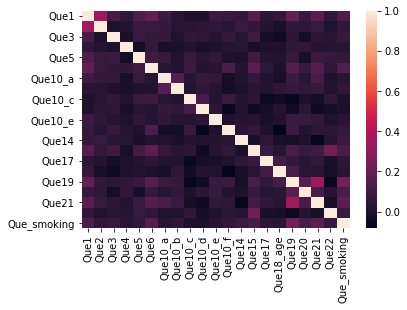

In [20]:
corr = model_data.corr()
sns.heatmap(corr)

In [21]:
target_data = perform_mapping(target, questions_map_EN)
target_data

,Que16
0,NaN
1,1.0
2,NaN
3,NaN
4,0.0
...,...
4305,NaN
4306,1.0
4307,NaN
4308,NaN


In [22]:
model_data

,Que1,Que2,Que3,Que4,Que5,Que6,Que10_a,Que10_b,Que10_c,Que10_d,...,Que10_f,Que14,Que15,Que17,Que18_age,Que19,Que20,Que21,Que22,Que_smoking
0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,0.0,...,1.0,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN
3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
4,NaN,0.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,...,1.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,1.0,NaN,1.0,0.0,1.0,1.0,NaN,NaN,1.0,NaN,...,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
4306,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4307,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
4308,0.0,NaN,NaN,1.0,0.0,NaN,1.0,1.0,1.0,1.0,...,NaN,1.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [23]:
saved_data = model_data.copy()
saved_data['Que16'] = target_data
saved_data.to_csv('dataset/final_data.csv', index=False)
saved_data

,Que1,Que2,Que3,Que4,Que5,Que6,Que10_a,Que10_b,Que10_c,Que10_d,...,Que14,Que15,Que17,Que18_age,Que19,Que20,Que21,Que22,Que_smoking,Que16
0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,0.0,...,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,NaN
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN
3,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
4,NaN,0.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,1.0,NaN,1.0,0.0,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN
4306,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4307,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
4308,0.0,NaN,NaN,1.0,0.0,NaN,1.0,1.0,1.0,1.0,...,1.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN


/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


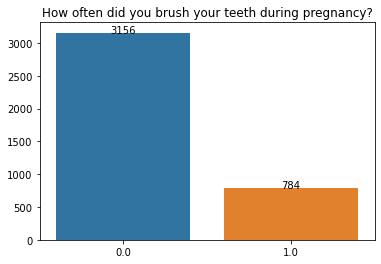

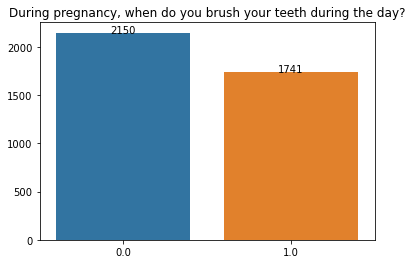

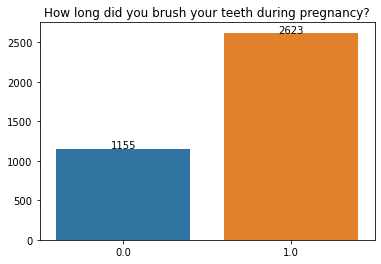

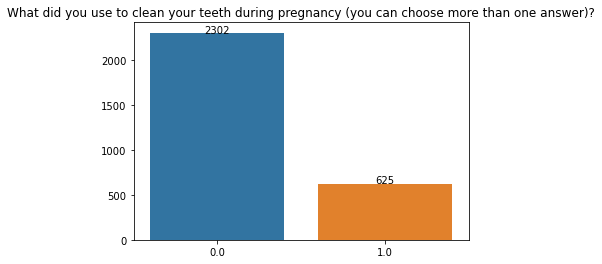

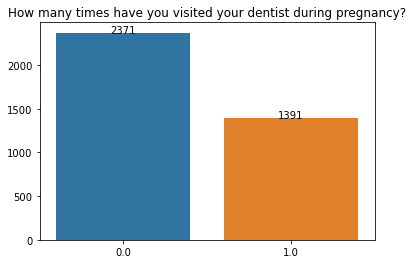

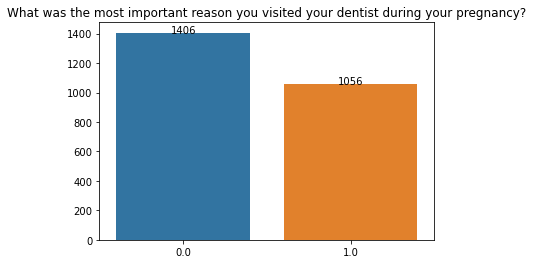

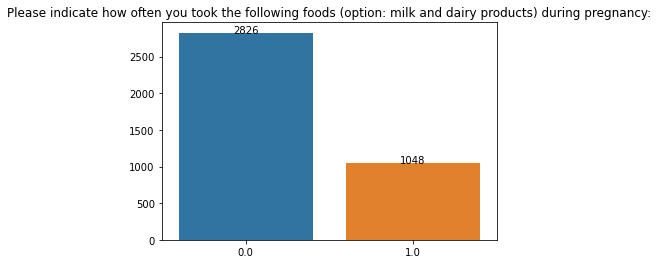

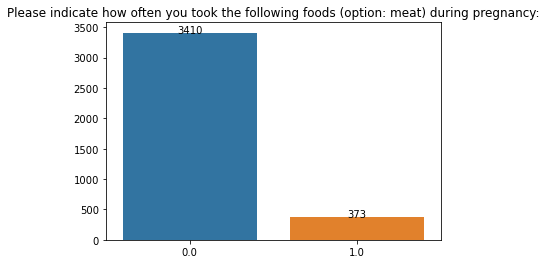

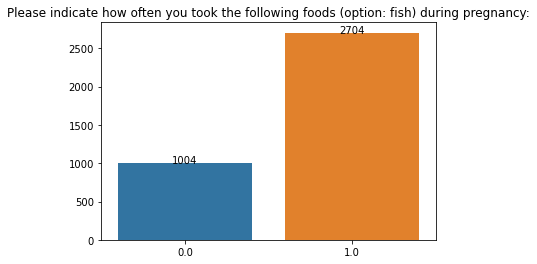

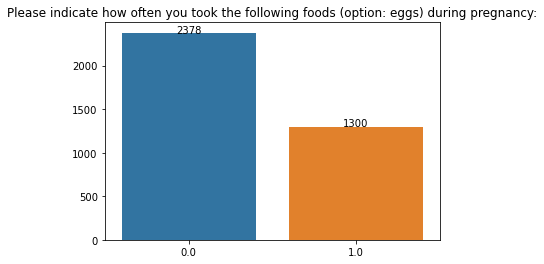

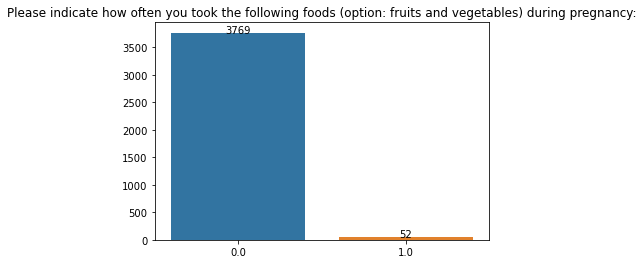

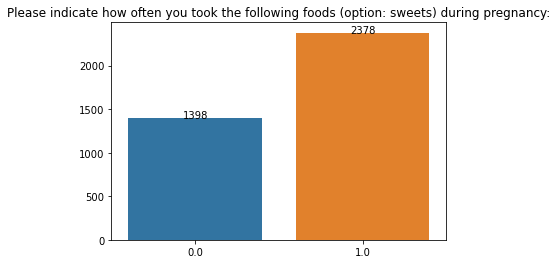

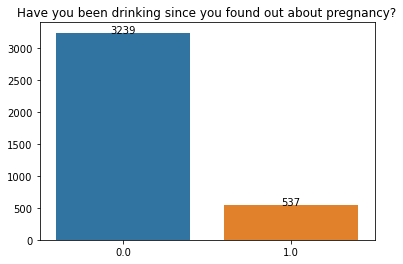

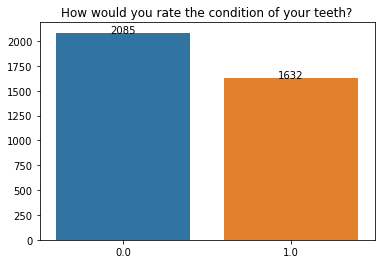

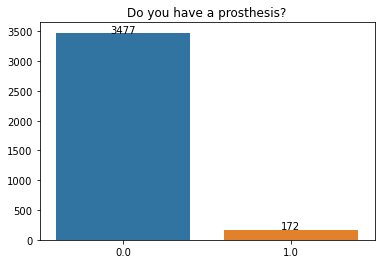

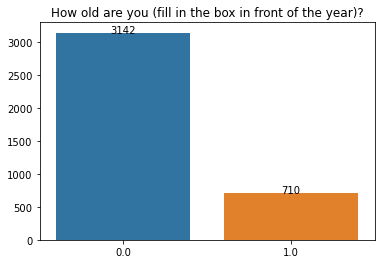

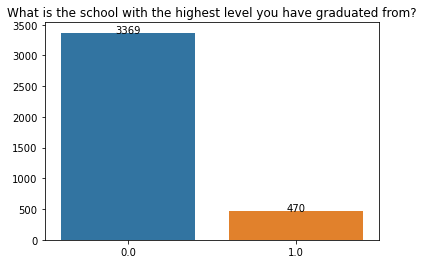

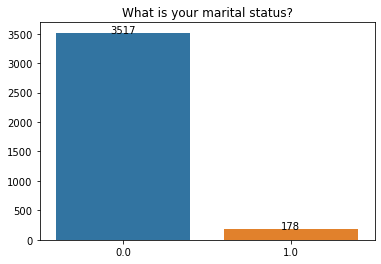

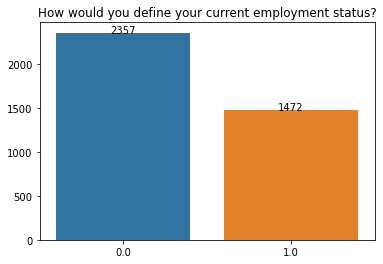

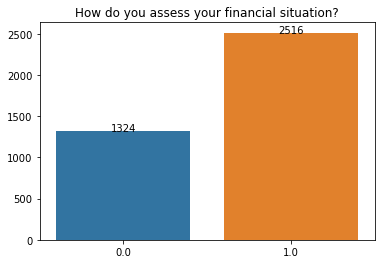

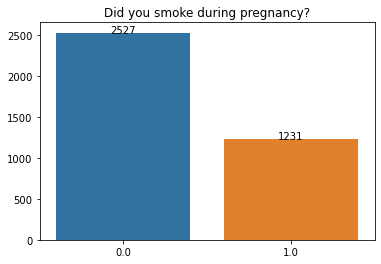

In [24]:
for idx, col in enumerate(cols):
    title = questions_EN[col]['text'] 
    plt.figure(idx)
    val_cnts = model_data[col].value_counts()
    val_cnts = val_cnts.sort_index()
    # replace x and y with each other for vertical plot
    ax = sns.barplot(x=val_cnts.index, y=val_cnts.values)
    ax.set_title(title)
    for ind, val in enumerate(val_cnts):
        ax.text(ind, val, val, color='black', ha="center")

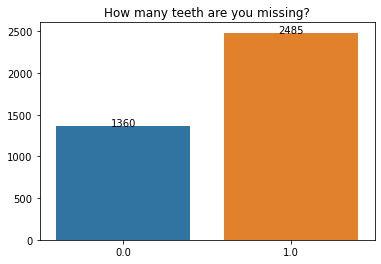

In [25]:
col = 'Que16'
title = questions_EN[col]['text'] 
plt.figure(idx)
val_cnts = target_data[col].value_counts()
val_cnts = val_cnts.sort_index()
# replace x and y with each other for vertical plot
ax = sns.barplot(x=val_cnts.index, y=val_cnts.values)
ax.set_title(title)
for ind, val in enumerate(val_cnts):
    ax.text(ind, val, val, color='black', ha="center")

In [56]:
for col in model_data.columns:
    print(col)
    logit = Logit(target_data, model_data[col], missing='drop')
    lg = logit.fit()
    print(lg.summary())

Que1
Optimization terminated successfully.
         Current function value: 0.673218
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Que16   No. Observations:                 3685
Model:                          Logit   Df Residuals:                     3684
Method:                           MLE   Df Model:                            0
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                -0.03345
Time:                        21:49:28   Log-Likelihood:                -2480.8
converged:                       True   LL-Null:                       -2400.5
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Que1           0.9622      0.084     11.458      0.000       0.798       1.127
Que2
Optimization termin

In [57]:
logit = Logit(target_data, model_data, missing='drop')
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.567824
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Que16   No. Observations:                  936
Model:                          Logit   Df Residuals:                      915
Method:                           MLE   Df Model:                           20
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                  0.1326
Time:                        21:49:35   Log-Likelihood:                -531.48
converged:                       True   LL-Null:                       -612.76
Covariance Type:            nonrobust   LLR p-value:                 2.403e-24
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Que1            0.6039      0.220      2.741      0.006       0.172       1.036
Que2           -0.3765    